In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder


In [30]:
skin_df = pd.read_csv('dataset/HAM10000_metadata.csv')
print(skin_df)

         lesion_id      image_id         dx dx_type   age   sex localization
0      HAM_0000118  ISIC_0027419        bkl   histo  80.0  male        scalp
1      HAM_0000118  ISIC_0025030        bkl   histo  80.0  male        scalp
2      HAM_0002730  ISIC_0026769        bkl   histo  80.0  male        scalp
3      HAM_0002730  ISIC_0025661        bkl   histo  80.0  male        scalp
4      HAM_0001466  ISIC_0031633        bkl   histo  75.0  male          ear
...            ...           ...        ...     ...   ...   ...          ...
10378       inj296        inj296  noncancer  google   NaN   NaN          NaN
10379       inj297        inj297  noncancer  google   NaN   NaN          NaN
10380       inj298        inj298  noncancer  google   NaN   NaN          NaN
10381       inj299        inj299  noncancer  google   NaN   NaN          NaN
10382       inj300        inj300  noncancer  google   NaN   NaN          NaN

[10383 rows x 7 columns]


In [31]:
SIZE=32

# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'noncancer', 'nv', 'random', 'vasc']


In [32]:
skin_df['label'] = le.transform(skin_df["dx"]) 
print(skin_df.sample(10))


         lesion_id      image_id         dx    dx_type   age     sex  \
8951   HAM_0000204  ISIC_0027639         nv      histo  55.0    male   
4721   HAM_0006378  ISIC_0024735         nv  follow_up  50.0    male   
1803   HAM_0004284  ISIC_0032730        mel      histo  80.0  female   
8101   HAM_0006390  ISIC_0025887         nv      histo  55.0    male   
10092        inj77         inj77  noncancer     google   NaN     NaN   
9465   HAM_0004387  ISIC_0033132         nv  consensus  55.0  female   
7567   HAM_0003884  ISIC_0033961         nv      histo  35.0  female   
1691   HAM_0004998  ISIC_0033651        mel      histo  60.0  female   
39     HAM_0003847  ISIC_0028560        bkl      histo  85.0    male   
4549   HAM_0001924  ISIC_0031112         nv  follow_up  45.0    male   

          localization  label  
8951              back      6  
4721             trunk      6  
1803              face      4  
8101             trunk      6  
10092              NaN      5  
9465           

C:\Users\Amreen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


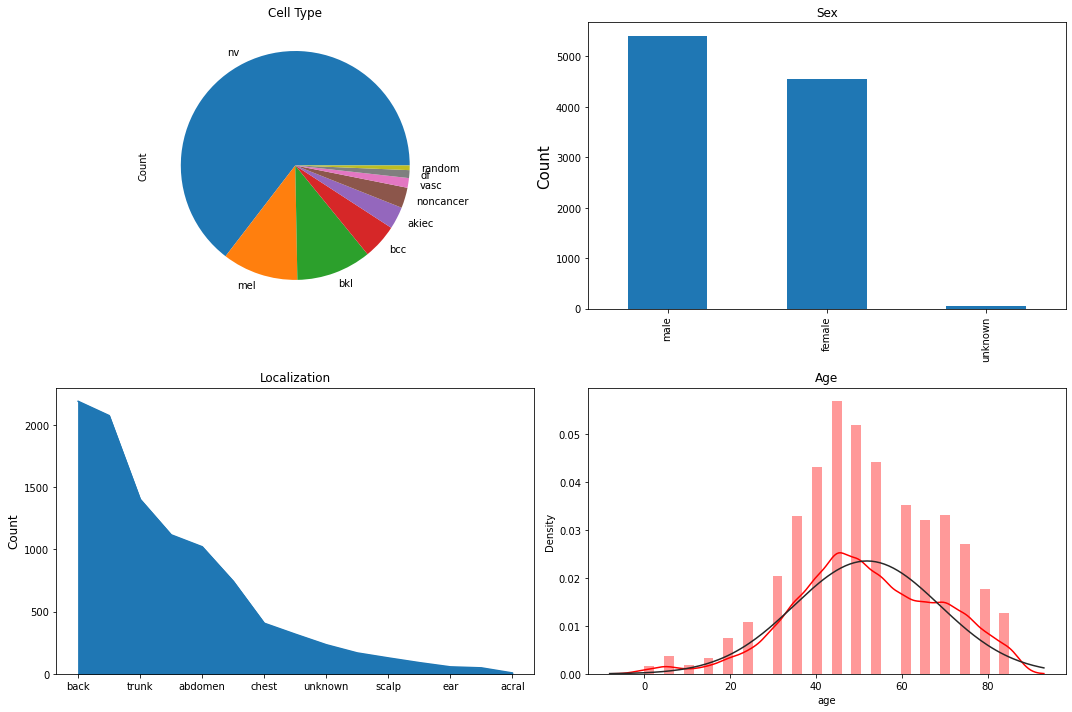

In [33]:
# Data distribution visualization
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='pie', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='area')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')


ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()



In [34]:
# Distribution of data into various classes 
from sklearn.utils import resample
print(skin_df['label'].value_counts())

#Balance data.
# Many ways to balance data... you can also try assigning weights during model.fit
#Separate each classes, resample, and combine back into single dataframe

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]
df_7 = skin_df[skin_df['label'] == 7]
df_8 = skin_df[skin_df['label'] == 8]


6    6705
4    1113
2    1099
1     514
0     327
5     300
8     142
3     115
7      68
Name: label, dtype: int64


In [35]:
n_samples=2000 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)
df_7_balanced = resample(df_7, replace=True, n_samples=n_samples, random_state=42)
df_8_balanced = resample(df_8, replace=True, n_samples=n_samples, random_state=42)

In [36]:
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, 
                              df_6_balanced, df_7_balanced, 
                              df_8_balanced])

In [37]:
print(skin_df_balanced)

        lesion_id      image_id     dx    dx_type   age     sex  \
9789  HAM_0003136  ISIC_0026645  akiec      histo  65.0    male   
9957  HAM_0006587  ISIC_0025780  akiec      histo  70.0    male   
9793  HAM_0005505  ISIC_0024450  akiec      histo  50.0    male   
9758  HAM_0003455  ISIC_0027896  akiec      histo  75.0    male   
9875  HAM_0005459  ISIC_0029268  akiec      histo  85.0    male   
...           ...           ...    ...        ...   ...     ...   
2355  HAM_0005878  ISIC_0033450   vasc      histo  15.0    male   
2445  HAM_0001091  ISIC_0031955   vasc  consensus  30.0  female   
2387  HAM_0004820  ISIC_0030722   vasc  consensus  45.0  female   
2397  HAM_0000502  ISIC_0029608   vasc  consensus  70.0    male   
2424  HAM_0002177  ISIC_0025612   vasc  consensus  45.0  female   

         localization  label  
9789             back      0  
9957             face      0  
9793  upper extremity      0  
9758             hand      0  
9875  upper extremity      0  
...      

In [38]:
#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
print(skin_df_balanced['label'].value_counts())

0    2000
1    2000
2    2000
3    2000
4    2000
5    2000
6    2000
7    2000
8    2000
Name: label, dtype: int64


In [39]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('dataset/', '*', '*.jpg'))}

In [40]:
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)
#print(skin_df_balanced['path'])

In [41]:
print(skin_df_balanced)

        lesion_id      image_id     dx    dx_type   age     sex  \
9789  HAM_0003136  ISIC_0026645  akiec      histo  65.0    male   
9957  HAM_0006587  ISIC_0025780  akiec      histo  70.0    male   
9793  HAM_0005505  ISIC_0024450  akiec      histo  50.0    male   
9758  HAM_0003455  ISIC_0027896  akiec      histo  75.0    male   
9875  HAM_0005459  ISIC_0029268  akiec      histo  85.0    male   
...           ...           ...    ...        ...   ...     ...   
2355  HAM_0005878  ISIC_0033450   vasc      histo  15.0    male   
2445  HAM_0001091  ISIC_0031955   vasc  consensus  30.0  female   
2387  HAM_0004820  ISIC_0030722   vasc  consensus  45.0  female   
2397  HAM_0000502  ISIC_0029608   vasc  consensus  70.0    male   
2424  HAM_0002177  ISIC_0025612   vasc  consensus  45.0  female   

         localization  label                                             path  
9789             back      0  dataset\HAM10000_images_part_1\ISIC_0026645.jpg  
9957             face      0  datas

In [42]:
print(skin_df_balanced['path'])

9789    dataset\HAM10000_images_part_1\ISIC_0026645.jpg
9957    dataset\HAM10000_images_part_1\ISIC_0025780.jpg
9793    dataset\HAM10000_images_part_1\ISIC_0024450.jpg
9758    dataset\HAM10000_images_part_1\ISIC_0027896.jpg
9875    dataset\HAM10000_images_part_1\ISIC_0029268.jpg
                             ...                       
2355    dataset\HAM10000_images_part_2\ISIC_0033450.jpg
2445    dataset\HAM10000_images_part_2\ISIC_0031955.jpg
2387    dataset\HAM10000_images_part_2\ISIC_0030722.jpg
2397    dataset\HAM10000_images_part_2\ISIC_0029608.jpg
2424    dataset\HAM10000_images_part_1\ISIC_0025612.jpg
Name: path, Length: 18000, dtype: object


In [18]:
#Use the path to read images. Resize
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))
print(skin_df_balanced['image'])


9789    [[[155, 118, 107], [162, 126, 118], [174, 140,...
9957    [[[138, 76, 82], [131, 64, 68], [139, 73, 81],...
9793    [[[123, 86, 87], [174, 137, 137], [197, 161, 1...
9758    [[[205, 149, 175], [207, 149, 169], [214, 158,...
9875    [[[203, 174, 199], [205, 174, 197], [206, 175,...
                              ...                        
2355    [[[140, 108, 115], [161, 126, 131], [169, 133,...
2445    [[[194, 126, 140], [196, 125, 143], [198, 123,...
2387    [[[241, 215, 226], [241, 214, 224], [238, 212,...
2397    [[[231, 190, 208], [232, 192, 209], [233, 192,...
2424    [[[182, 88, 99], [182, 87, 98], [186, 89, 102]...
Name: image, Length: 18000, dtype: object


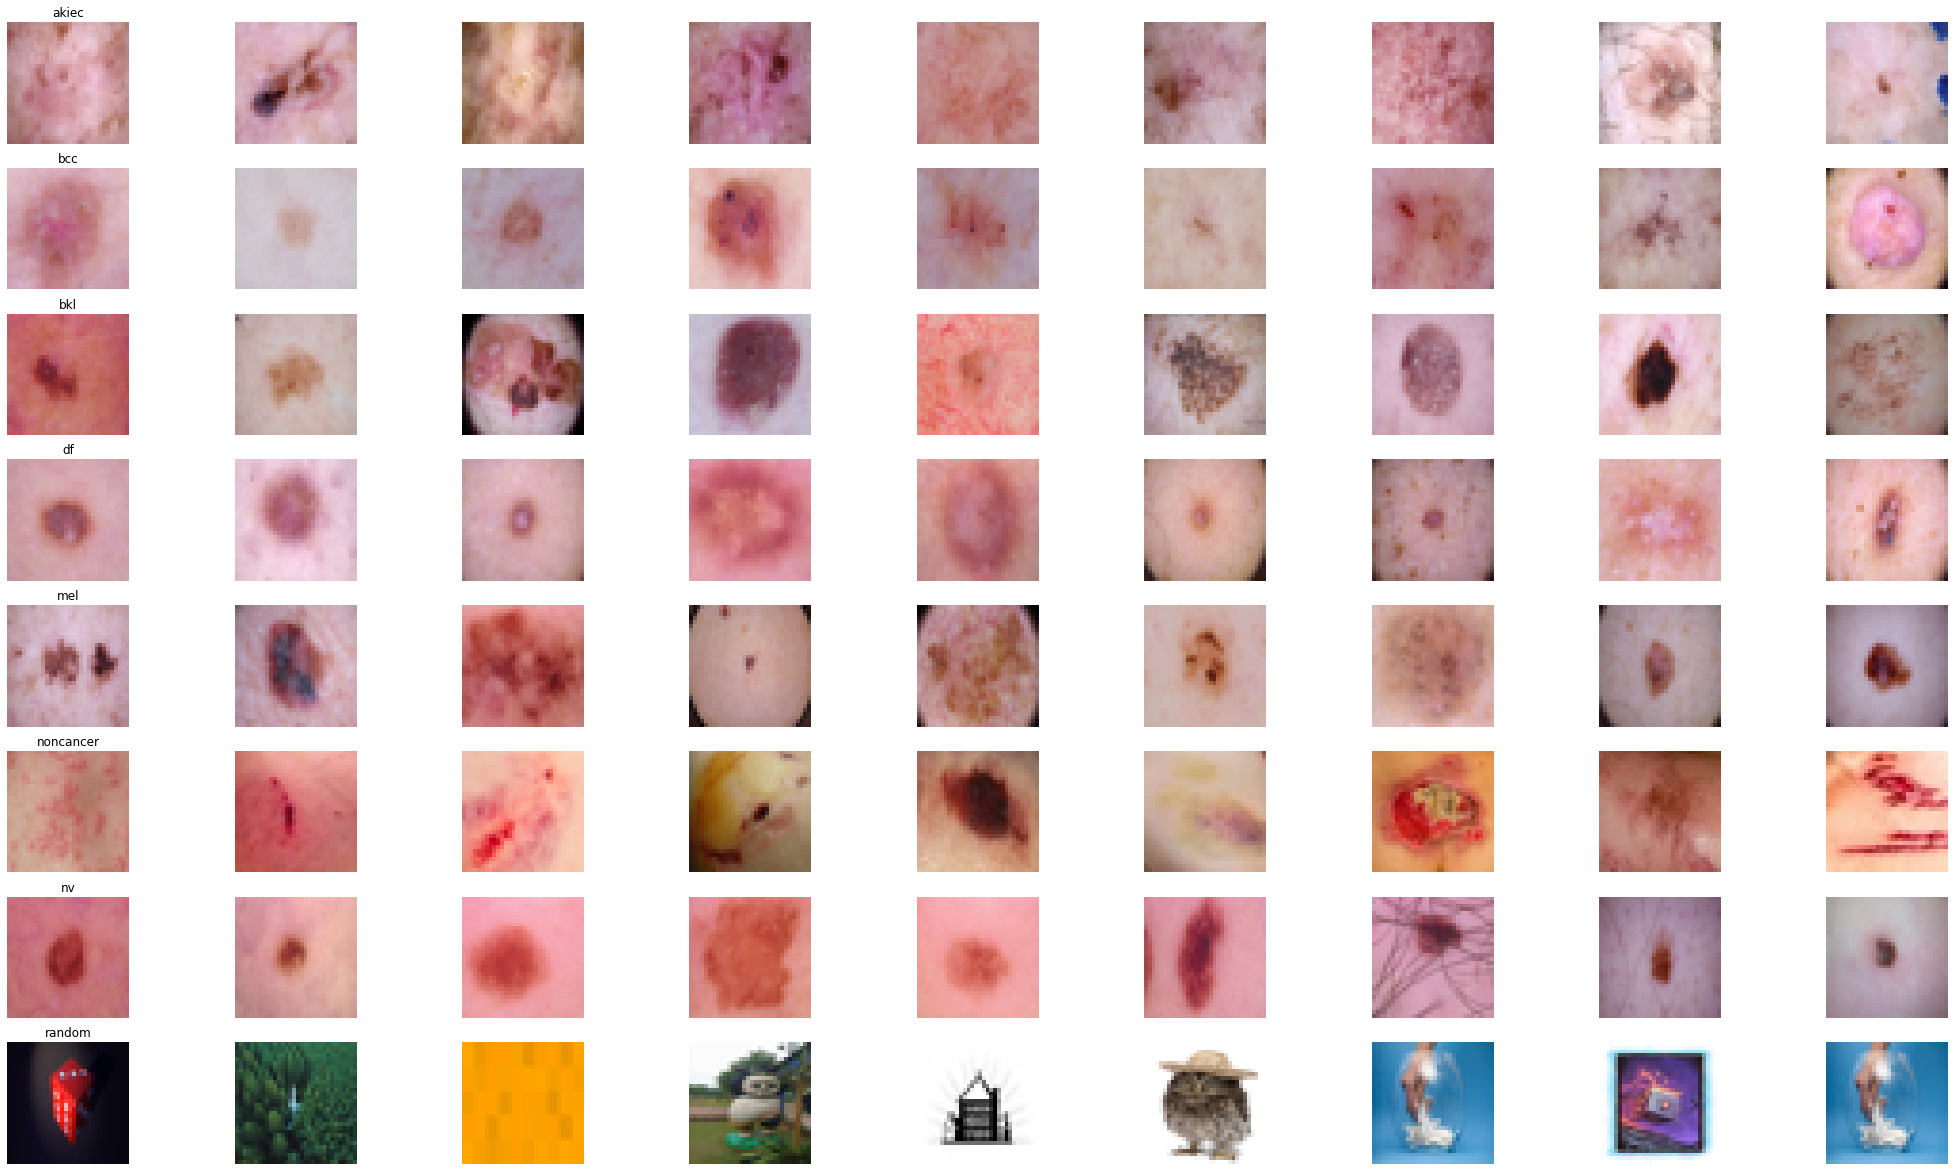

In [19]:
n_samples = 9  

# Plot
fig, m_axs = plt.subplots(8, n_samples, figsize = (4*n_samples, 3*7))
#see
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [20]:
#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255. # Scale values to 0-1. You can also used standardscaler or other scaling methods.
#print(X)
Y=skin_df_balanced['label'] #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=9) #Convert to categorical as this is a multiclass classification problem
#Split to training and testing. Get a very small dataset for training as we will be 
# fitting it to many potential models. 
print(Y_cat)
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.2, random_state=42)


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [21]:
num_classes = 9
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(9, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [22]:
batch_size = 16
epochs = 200
#what is batch size?
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

Epoch 1/200
900/900 - 166s - loss: 1.5830 - acc: 0.3944 - val_loss: 1.3198 - val_acc: 0.5172 - 166s/epoch - 184ms/step
Epoch 2/200
900/900 - 179s - loss: 1.2590 - acc: 0.5240 - val_loss: 1.1327 - val_acc: 0.5983 - 179s/epoch - 199ms/step
Epoch 3/200
900/900 - 177s - loss: 1.1276 - acc: 0.5767 - val_loss: 1.0400 - val_acc: 0.6092 - 177s/epoch - 196ms/step
Epoch 4/200
900/900 - 184s - loss: 1.0436 - acc: 0.6068 - val_loss: 0.9934 - val_acc: 0.6325 - 184s/epoch - 205ms/step
Epoch 5/200
900/900 - 149s - loss: 0.9771 - acc: 0.6338 - val_loss: 0.8697 - val_acc: 0.6847 - 149s/epoch - 166ms/step
Epoch 6/200
900/900 - 137s - loss: 0.9066 - acc: 0.6610 - val_loss: 0.8623 - val_acc: 0.6889 - 137s/epoch - 152ms/step
Epoch 7/200
900/900 - 152s - loss: 0.8610 - acc: 0.6769 - val_loss: 0.7594 - val_acc: 0.7344 - 152s/epoch - 169ms/step
Epoch 8/200
900/900 - 157s - loss: 0.8036 - acc: 0.6973 - val_loss: 0.7464 - val_acc: 0.7189 - 157s/epoch - 175ms/step
Epoch 9/200
900/900 - 163s - loss: 0.7670 - acc:

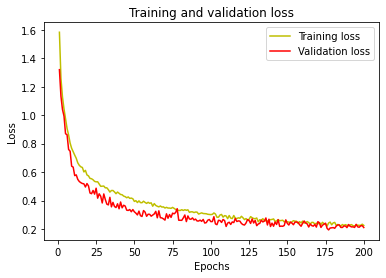

In [23]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

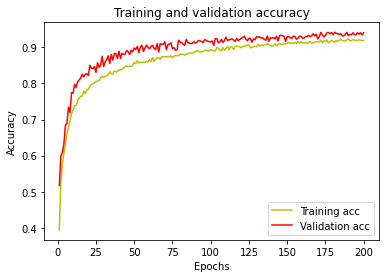

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [25]:
# Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 


In [26]:
from sklearn.metrics import confusion_matrix
#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

In [27]:
print(cm)

[[383   0   0   0   2   0   0   0   0]
 [  6 402   3   0   0   0   0   0   2]
 [ 17   7 342   3  17   0  15   0   5]
 [  0   0   0 419   0   0   0   0   0]
 [  3   3  32   0 355   0  14   0   0]
 [  0   0   0   0   0 394   0   0   0]
 [  5   9  38   1  29   3 319   0   0]
 [  0   0   0   0   0   0   0 388   0]
 [  0   0   0   0   0   0   0   0 384]]


In [44]:
#Save the model
model.save('model_94_9.h5')